In [3]:
#check this
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load and preprocess data
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')

C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6384 - loss: 0.6021 - val_accuracy: 0.8613 - val_loss: 0.3672
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2867 - val_accuracy: 0.9596 - val_loss: 0.1510
Epoch 3/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1485 - val_accuracy: 0.9616 - val_loss: 0.1151
Epoch 4/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1239 - val_accuracy: 0.9663 - val_loss: 0.0984
Epoch 5/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9581 - loss: 0.1095 - val_accuracy: 0.9703 - val_loss: 0.0879
Epoch 6/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.0948 - val_accuracy: 0.9719 - val_loss: 0.0774
Epoch 7/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0851 - val_accuracy: 0.9750 - val_loss: 0.0684
Epoch 8/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0758 - val_accu

KeyboardInterrupt: 

Epoch 1/200


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.7477 - loss: 4.0667 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7472 - loss: 4.0747 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.7472 - loss: 4.0752 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.7492 - loss: 4.0429 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7484 - loss: 4.0560 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.7489 - loss: 4.0470 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.7480 - loss: 4.0621 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.7458 - loss: 4.0968 - val_accuracy: 0.7467 - val_loss: 4.0

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

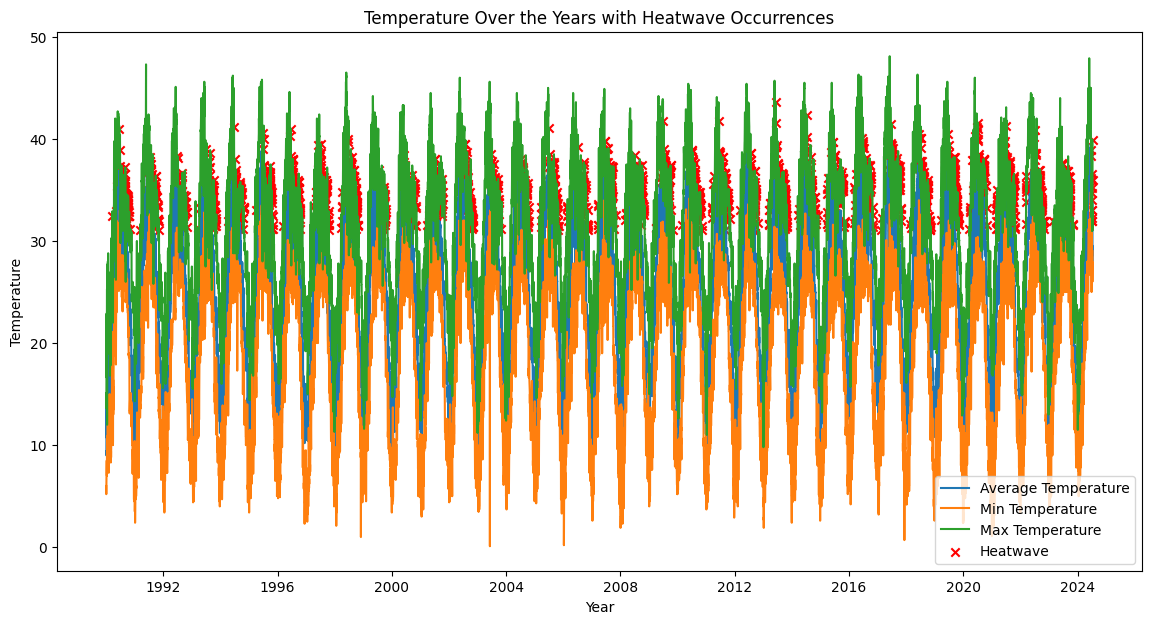

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data (assuming '12delhi_cleaned.csv' contains the dataset)
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature and humidity
threshold_temp = 31  # Example threshold for temperature to classify as heatwave
threshold_humid = 60  # Example threshold for humidity to classify as heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=4000, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()  # Include average humidity
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10088/10088 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - accuracy: 0.7572 - loss: 2.3364 - val_accuracy: 0.7467 - val_loss: 4.0822
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 74.6730083234245
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1884
           1       0.00      0.00      0.00       639

    accuracy                           0.75      2523
   macro avg       0.37      0.50      0.43      2523
weighted avg       0.56      0.75      0.64      2523



C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

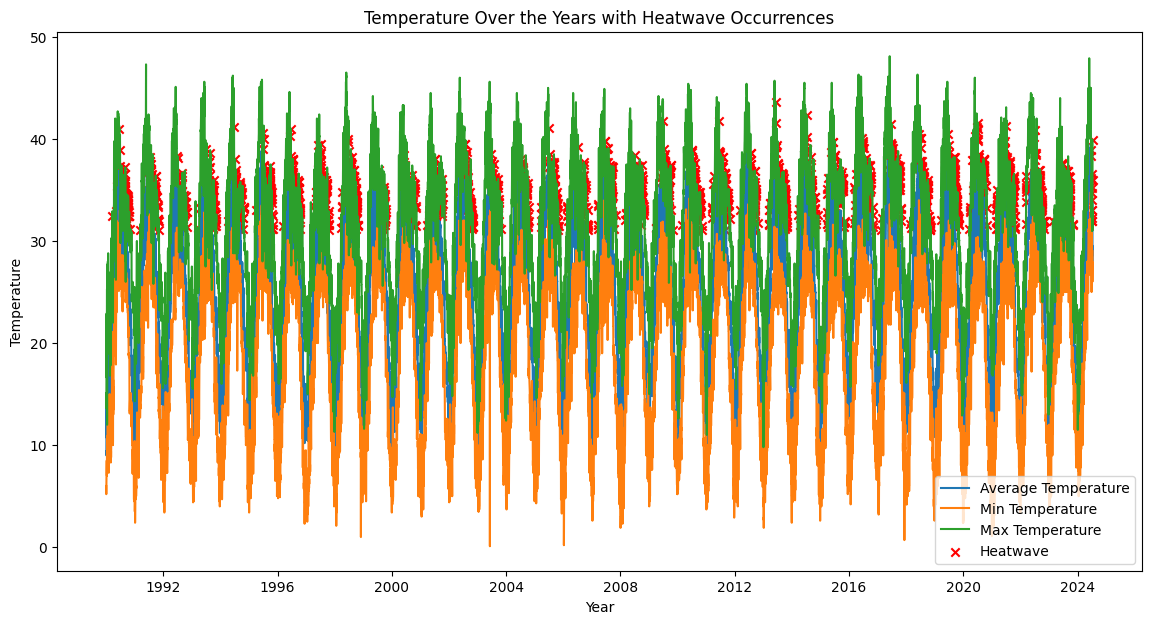

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for 2024-06-06: No Heatwave
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for 2024-12-12: No Heatwave


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data (assuming '12delhi_cleaned.csv' contains the dataset)
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')
def classify_heatwave(row):
    # Incorporate additional criteria based on meteorological factors
    if row['tmax'] > threshold_temp and row['humid'] > threshold_humid and row['dew_point'] > some_threshold:
        return 1
    else:
        return 0

# ... (rest of the code)

# Feature engineering (example)
def create_features(df):
    df['temperature_anomaly'] = df['tavg'] - df['tavg'].mean()
    # Add other feature engineering techniques

# ... (rest of the code)

# Handle imbalanced dataset (example)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define labels for heatwave classification based on threshold temperature and humidity
threshold_temp = 31  # Example threshold for temperature to classify as heatwave
threshold_humid = 60  # Example threshold for humidity to classify as heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()  # Include average humidity
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.over_sampling import SMOTE

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 31  # Example threshold for temperature to classify as heatwave
threshold_humid = 60  # Example threshold for humidity to classify as heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Feature engineering (example)
def create_features(df):
    df['temperature_anomaly'] = df['tavg'] - df['tavg'].mean()
    # Add other feature engineering techniques if needed

# Create features
create_features(df)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handle imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()  # Include average humidity
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Epoch 1/100


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7584 - loss: 3.8946 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7697 - loss: 3.7123 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 3/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7563 - loss: 3.9273 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 4/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7635 - loss: 3.8113 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 5/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 3.8811 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 6/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 3.8893 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 7/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 3.7483 - val_accuracy: 0.7650 - val_loss: 3.7884
Epoch 8/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7570 - loss: 3.9166 - val_accuracy: 0.7650

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.7649623464130004
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1930
           1       0.00      0.00      0.00       593

    accuracy                           0.76      2523
   macro avg       0.38      0.50      0.43      2523
weighted avg       0.59      0.76      0.66      2523

Invalid input format. Please use: time,tavg,tmin,tmax,prcp,humid


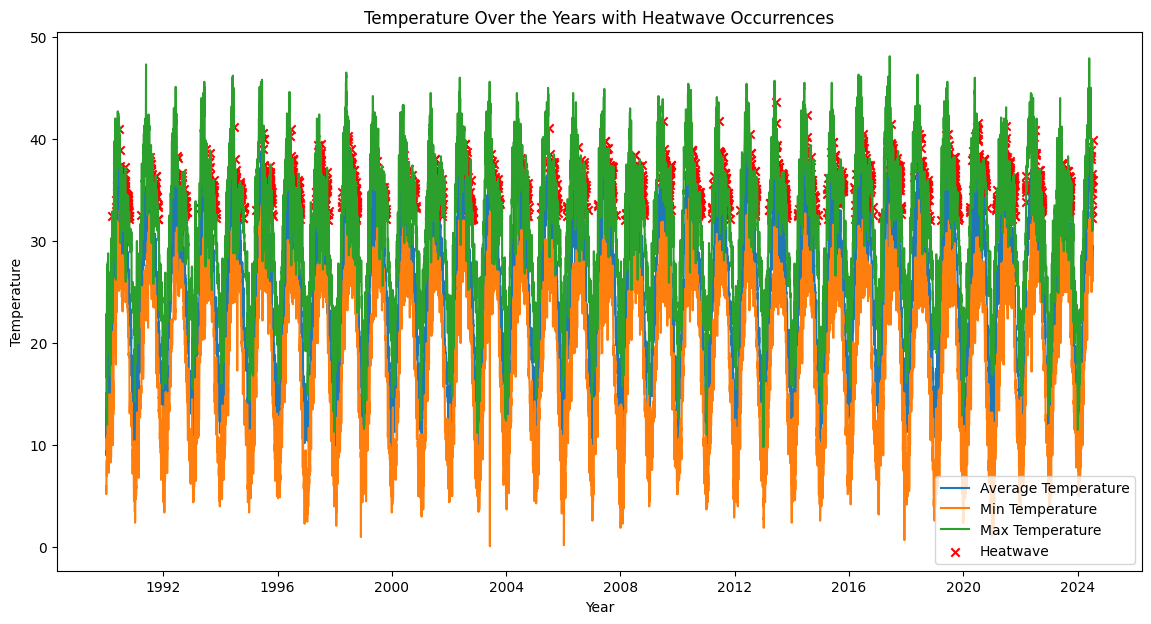

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on the given criteria
df['Heatwave'] = np.where(((df['tmax'] > 38) & (df['humid'] >= 60)) | 
                          ((df['tmax'] > 32) & (df['humid'] >= 60)), 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given input data
def predict_heatwave(data):
    sample = np.array([data])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Interactive user input
while True:
    input_data = input("Enter data (time,tavg,tmin,tmax,prcp,humid) or 'exit' to quit: ")
    if input_data.lower() == 'exit':
        break
    try:
        time, tavg, tmin, tmax, prcp, humid = input_data.split(',')
        data = [float(tavg), float(tmin), float(tmax), float(prcp), float(humid)]
        prediction = predict_heatwave(data)
        print(f'Prediction for {time}: {prediction}')
    except ValueError:
        print("Invalid input format. Please use: time,tavg,tmin,tmax,prcp,humid")

# Plot temperature and humidity over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()
